<a href="https://colab.research.google.com/github/smayo2/BHousePricePredictor/blob/master/b_house_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Predict price of house given a  list of relevant features 


In [0]:
 # -*- coding: utf-8 -*-
"""
First created on Wed May  8 22:12:39 2019
@author smayo2
"""

from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,KFold
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import pandas_profiling
import numpy as np
import xgboost as xgb
import warnings
#%matplotlibe inline
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
#Specify some inputs
target_var = 'MEDV'

col_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

#read data file
#data source: 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
data_file = 'https://raw.githubusercontent.com/smayo2/BHousePricePredictor/master/datasets/housing.data'
df = pd.read_csv(data_file, header=None,names=col_names,delim_whitespace =True)

#get info about data
print(df.head())
#print(df.info())
print(df.describe())

# Pandas profiling (detailed) 
#pandas_profiling.ProfileReport(df)

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]
             CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%  

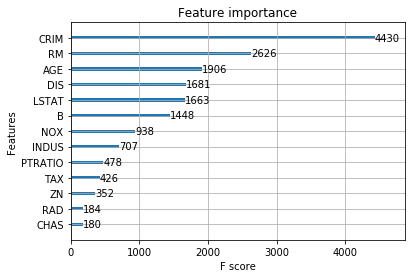

mean validation score for method 1: 0.8343444542759251
mean validation score for method 2:  0.8681733098894625
Mean squared error for method 1: 17.28085882352941
Mean squared error for method 2:  10.06459658056285

 SCORE FOR XGBOOST:
0.8738494903904317
{'max_depth': 4, 'n_estimators': 1000}


In [3]:
#separate data into input and target data
X= df.drop([target_var],axis=1)

#last column is target class
y= df.iloc[:,-1]

#split data into test and train data#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=32)


########################################################
#First predictor
#clf = DecisionTreeRegressor(random_state=1)
clf = RandomForestRegressor(n_estimators=5, random_state=1)
#clf.fit(X_train,y_train)
scores = cross_val_score(clf, X_train,y_train, cv=5) 
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
pred_score = mean_squared_error(y_test, y_pred)

################################
# Compare with second method
warnings.simplefilter(action='ignore', category=Warning) #issue with version of Pandas used in XGB

clf2 = xgb.XGBRegressor(objective='reg:squarederror', max_depth=10, n_estimators=500)
scores2 = cross_val_score(clf2, X_train,y_train, cv=5) 
clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)
pred_score2 = mean_squared_error(y_test, y_pred2)

#plot of important features 
xgb.plot_importance(clf2)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

#print results
print('mean validation score for method 1:', scores.mean())
print('mean validation score for method 2: ', scores2.mean())
print('Mean squared error for method 1:', pred_score)
print('Mean squared error for method 2: ', pred_score2)

#do Grid search for best parameters
                    'n_estimators': [500,1000,2000

grid_xgb = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror'),
                   {'max_depth': [2,4,6],]},verbose=0, cv=5)
grid_xgb.fit(X_train,y_train)
print('\n SCORE FOR XGBOOST:')    
print(grid_xgb.best_score_)
print(grid_xgb.best_params_)

#Ref
#https://www.datacamp.com/community/tutorials/xgboost-in-python
#https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py